In [48]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

%matplotlib inline


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/airline-passengers.csv")

In [3]:
df.head()

,Date,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.index = pd.to_datetime(df.Date)

In [6]:
df.head()

,Date,Count
Date,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [12]:
airlines = df.drop(columns=["Date"])

In [13]:
airlines.head()

,Count
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


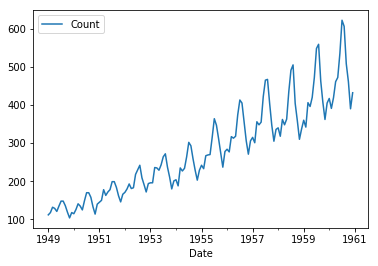

In [14]:
airlines.plot()

In [27]:
stocks = pd.read_csv("/Data/stocks.csv")
stocks.index = pd.to_datetime(stocks.date)
stocks.drop(columns=["date"], inplace=True)
stocks.head()

,open,high,low,close,volume,adjclose,symbol
date,,,,,,,
2000-07-17,95.437500,97.500000,92.750000,96.62500,3508100.0,74.269199,XLNX
2000-07-17,22.625000,22.750000,22.437500,22.56250,201600.0,13.486140,ES
2000-07-17,6.750002,6.937503,6.375000,6.50000,1235700.0,5.241649,CHK
2000-07-17,19.812501,20.187500,19.500001,20.18750,1434100.0,3.806147,NI
2000-07-17,30.500000,30.687500,30.000000,30.03125,254600.0,19.811830,SNA


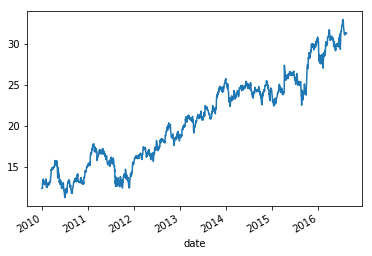

In [71]:
ge = stocks[stocks.symbol == "GE"].query("index > 2010").adjclose
ge.plot()

In [72]:
ge.head(10)

date
2010-01-04    12.462550
2010-01-05    12.527081
2010-01-06    12.462550
2010-01-07    13.107860
2010-01-08    13.390183
2010-01-11    13.519245
2010-01-12    13.527312
2010-01-13    13.575709
2010-01-14    13.470847
2010-01-15    13.261121
Name: adjclose, dtype: float64

In [73]:
ge.resample("1D").ffill().head(10)

date
2010-01-04    12.462550
2010-01-05    12.527081
2010-01-06    12.462550
2010-01-07    13.107860
2010-01-08    13.390183
2010-01-09    13.390183
2010-01-10    13.390183
2010-01-11    13.519245
2010-01-12    13.527312
2010-01-13    13.575709
Freq: D, Name: adjclose, dtype: float64

In [74]:
ge.resample("1D").bfill().head(10)

date
2010-01-04    12.462550
2010-01-05    12.527081
2010-01-06    12.462550
2010-01-07    13.107860
2010-01-08    13.390183
2010-01-09    13.519245
2010-01-10    13.519245
2010-01-11    13.519245
2010-01-12    13.527312
2010-01-13    13.575709
Freq: D, Name: adjclose, dtype: float64

In [75]:
ge.resample("1D").interpolate().head(10)

date
2010-01-04    12.462550
2010-01-05    12.527081
2010-01-06    12.462550
2010-01-07    13.107860
2010-01-08    13.390183
2010-01-09    13.433204
2010-01-10    13.476224
2010-01-11    13.519245
2010-01-12    13.527312
2010-01-13    13.575709
Freq: D, Name: adjclose, dtype: float64

In [76]:
ge = pd.DataFrame(ge)

In [77]:
ge["rolling_mean"] = ge.rolling(3).mean()
ge.head(10)

,adjclose,rolling_mean
date,,
2010-01-04,12.462550,NaN
2010-01-05,12.527081,NaN
2010-01-06,12.462550,12.484060
2010-01-07,13.107860,12.699164
2010-01-08,13.390183,12.986864
2010-01-11,13.519245,13.339096
2010-01-12,13.527312,13.478913
2010-01-13,13.575709,13.540755
2010-01-14,13.470847,13.524623


In [78]:
np.mean([12.462550,12.527081, 12.462550])

12.484060333333334

In [79]:
ge["rolling_mean"] = ge.rolling(3).mean().shift(1)
ge.head(10)

,adjclose,rolling_mean
date,,
2010-01-04,12.462550,NaN
2010-01-05,12.527081,NaN
2010-01-06,12.462550,NaN
2010-01-07,13.107860,12.484060
2010-01-08,13.390183,12.699164
2010-01-11,13.519245,12.986864
2010-01-12,13.527312,13.339096
2010-01-13,13.575709,13.478913
2010-01-14,13.470847,13.540755


In [80]:
ge1 = ge.dropna()
metrics.r2_score(ge1.adjclose, ge1.rolling_mean)

0.9961968604320676

In [81]:
ge["pct_change"] = ge.adjclose.pct_change()
ge["pct_change_shift"] = ge.adjclose.pct_change().shift()
ge.head(10)

,adjclose,rolling_mean,pct_change,pct_change_shift
date,,,,
2010-01-04,12.462550,NaN,NaN,NaN
2010-01-05,12.527081,NaN,0.005178,NaN
2010-01-06,12.462550,NaN,-0.005151,0.005178
2010-01-07,13.107860,12.484060,0.051780,-0.005151
2010-01-08,13.390183,12.699164,0.021538,0.051780
2010-01-11,13.519245,12.986864,0.009639,0.021538
2010-01-12,13.527312,13.339096,0.000597,0.009639
2010-01-13,13.575709,13.478913,0.003578,0.000597
2010-01-14,13.470847,13.540755,-0.007724,0.003578


In [82]:
(12.527081 - 12.462550)/12.462550

0.005177993267830465

In [84]:
ge["diff1"] = ge.adjclose.diff(1)
ge.head()

,adjclose,rolling_mean,pct_change,pct_change_shift,diff1
date,,,,,
2010-01-04,12.462550,NaN,NaN,NaN,NaN
2010-01-05,12.527081,NaN,0.005178,NaN,0.064531
2010-01-06,12.462550,NaN,-0.005151,0.005178,-0.064531
2010-01-07,13.107860,12.484060,0.051780,-0.005151,0.645310
2010-01-08,13.390183,12.699164,0.021538,0.051780,0.282323


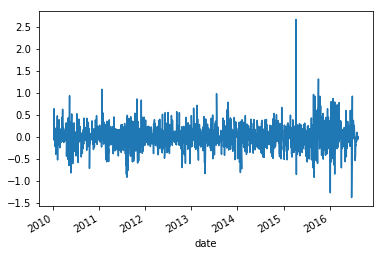

In [85]:
ge.diff1.plot()

In [86]:
ge["e1"] = ge.adjclose.diff().shift(1)
ge["e2"] = ge.adjclose.diff().shift(2)
ge["e3"] = ge.adjclose.diff().shift(3)
ge.head(10)

,adjclose,rolling_mean,pct_change,pct_change_shift,diff1,e1,e2,e3
date,,,,,,,,
2010-01-04,12.462550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,12.527081,NaN,0.005178,NaN,0.064531,NaN,NaN,NaN
2010-01-06,12.462550,NaN,-0.005151,0.005178,-0.064531,0.064531,NaN,NaN
2010-01-07,13.107860,12.484060,0.051780,-0.005151,0.645310,-0.064531,0.064531,NaN
2010-01-08,13.390183,12.699164,0.021538,0.051780,0.282323,0.645310,-0.064531,0.064531
2010-01-11,13.519245,12.986864,0.009639,0.021538,0.129062,0.282323,0.645310,-0.064531
2010-01-12,13.527312,13.339096,0.000597,0.009639,0.008067,0.129062,0.282323,0.645310
2010-01-13,13.575709,13.478913,0.003578,0.000597,0.048397,0.008067,0.129062,0.282323
2010-01-14,13.470847,13.540755,-0.007724,0.003578,-0.104862,0.048397,0.008067,0.129062
